#**DATA MINING PROJECT**
## **GROUP MEMBERS**
Inzish Khan 21l-6264

Shirmeen Aamir 21l-5653

Khadija Javid 21L-5686

## **Read the CSV file**

In [46]:
import pandas as pd

df = pd.read_csv('/content/child_growth.csv')
df.head()

,weight,height,age,gross_motor,fine_motor,communication,problem_solving,emotional_development,attention_and_concentration,overactivity_and_impulsivity,passivity/inactivity,planning/organising,perception_of_directions,perception_of_visual_forms,memory,spoken_language,reading/writing,social_skills,emotional_problems,growth
0,16,113,1,poor,excellent,good,fair,fair,excellent,excellent,good,fair,good,good,good,good,fair,poor,no,normal
1,7,54,3,excellent,good,fair,poor,good,fair,fair,poor,good,poor,poor,poor,poor,fair,fair,yes,normal
2,17,106,1,poor,good,good,poor,poor,excellent,excellent,fair,poor,excellent,excellent,excellent,poor,excellent,good,yes,normal
3,11,114,5,good,good,poor,excellent,poor,excellent,fair,fair,fair,good,poor,good,good,poor,excellent,no,'over growth'
4,20,54,5,fair,excellent,poor,poor,excellent,fair,poor,fair,fair,poor,fair,excellent,fair,excellent,poor,no,normal


# **Preprocessing**

 **Preprocessing steps would involve handling missing values, visualizing the distribution of the target variable and relationships between features, extracting relevant features, encoding categorical variables, removing duplicates, and identifying and handling outliers. Finally, the dataset would be split into training and testing sets for model evaluation. These preprocessing tasks aim to ensure that the data is clean, informative, and appropriately formatted for machine learning algorithms to derive insights and make accurate predictions regarding child growth patterns.**

### **number of missing values in each column**

In [47]:
for column in df.columns:
    missing_values = df[column].isnull().sum()
    print(f"Number of missing values in '{column}': {missing_values}")


Number of missing values in 'weight': 0
Number of missing values in 'height': 0
Number of missing values in 'age': 0
Number of missing values in 'gross_motor': 0
Number of missing values in 'fine_motor': 0
Number of missing values in 'communication': 0
Number of missing values in 'problem_solving': 0
Number of missing values in 'emotional_development': 0
Number of missing values in 'attention_and_concentration': 0
Number of missing values in 'overactivity_and_impulsivity': 0
Number of missing values in 'passivity/inactivity': 0
Number of missing values in 'planning/organising': 0
Number of missing values in 'perception_of_directions': 0
Number of missing values in 'perception_of_visual_forms': 0
Number of missing values in 'memory': 0
Number of missing values in 'spoken_language': 0
Number of missing values in 'reading/writing': 0
Number of missing values in 'social_skills': 0
Number of missing values in 'emotional_problems': 0
Number of missing values in 'growth': 0


### **Data Visualization**

**generates a count plot of the target variable ('growth'). Count plots are useful for categorical variables as they show the frequency of each category in the dataset.**

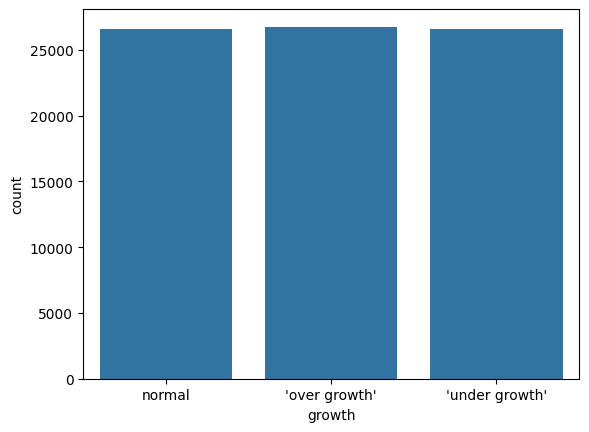

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='growth', data=df, )
plt.show()

**create box plots for numerical features like age,weight, height grouped by the target variable growth**

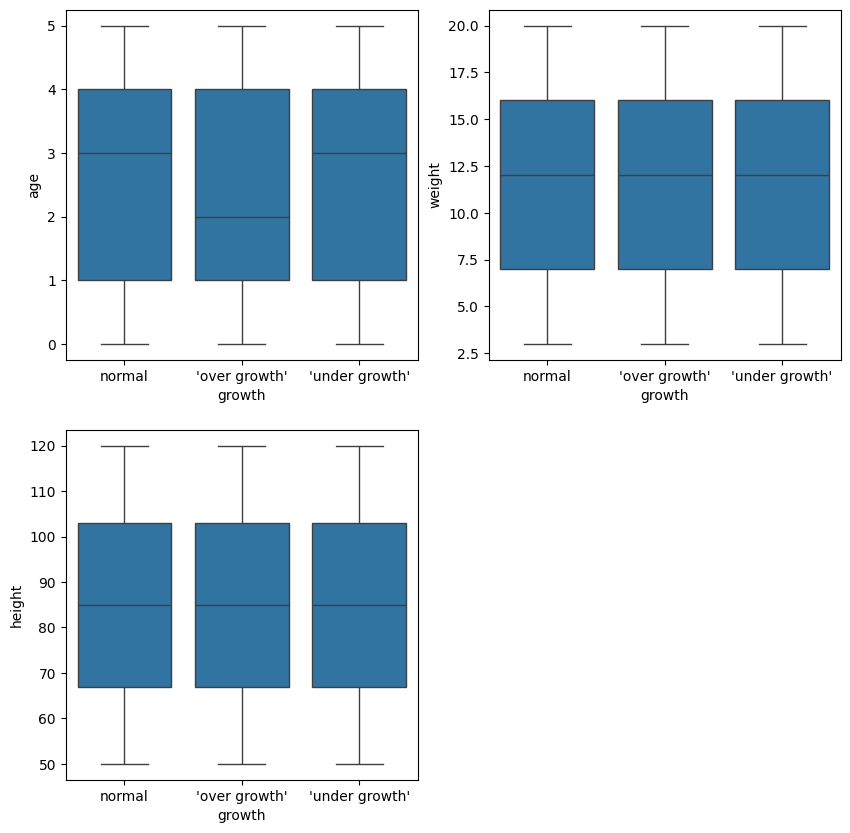

In [49]:
def graph(y):
	sns.boxplot(x="growth", y=y, data=df)

plt.figure(figsize=(10,10))

plt.subplot(221)
graph('age')

plt.subplot(222)
graph('weight')

plt.subplot(223)
graph('height')

plt.show()

**Pair plots provide a quick overview of the relationships between different features and how they vary with the target variable.**

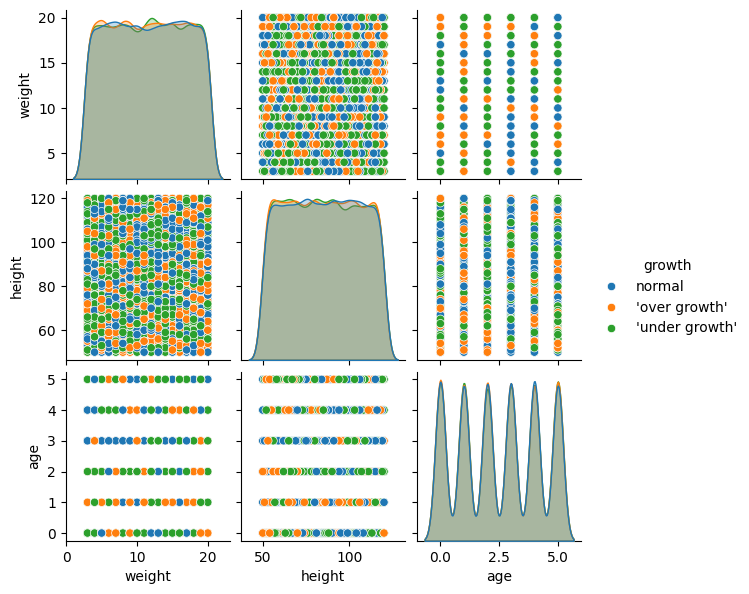

In [50]:
sns.pairplot(df, hue='growth', height=2)

### **Feature extrection**

**remove columns ('gross_motor', 'fine_motor', 'perception_of_directions')these columns are deemed irrelevant or redundant for the analysis**

In [51]:
df.drop('gross_motor', axis=1, inplace=True)
df.drop('fine_motor', axis=1, inplace=True)
df.drop('perception_of_directions', axis=1, inplace=True)

### **LabelEncoder**

**categorical columes  are encoded into numerical labels**

In [52]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in df.columns[3:]:
    df[column] = label_encoder.fit_transform(df[column])

### **remove the duplicate**

**Removing duplicates ensures that each data point in the dataset is unique**

In [53]:
subset_cols = ['weight', 'height', 'age']
df.drop_duplicates(subset=subset_cols, inplace=True)


### **number of outliers in each column**

**Outliers can significantly affect the performance of machine learning models, so detecting and handling them is essential to ensure model robustness and accuracy.**

In [54]:
def find_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (series < lower_bound) | (series > upper_bound)
    return outliers.sum()

for column in df.columns:
    if df[column].dtype != 'object':
        outliers_count = find_outliers_iqr(df[column])
        print(f"Number of outliers in '{column}': {outliers_count}")


Number of outliers in 'weight': 0
Number of outliers in 'height': 0
Number of outliers in 'age': 0
Number of outliers in 'communication': 0
Number of outliers in 'problem_solving': 0
Number of outliers in 'emotional_development': 0
Number of outliers in 'attention_and_concentration': 0
Number of outliers in 'overactivity_and_impulsivity': 0
Number of outliers in 'passivity/inactivity': 0
Number of outliers in 'planning/organising': 0
Number of outliers in 'perception_of_visual_forms': 0
Number of outliers in 'memory': 0
Number of outliers in 'spoken_language': 0
Number of outliers in 'reading/writing': 0
Number of outliers in 'social_skills': 0
Number of outliers in 'emotional_problems': 0
Number of outliers in 'growth': 0


### **TRAIN AND TESING**

In [55]:
from sklearn.model_selection import train_test_split
X = df.drop('growth', axis=1)
y = df['growth']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Preprocessed Dataset:")
print(df)

Preprocessed Dataset:
       weight  height  age  communication  problem_solving  \
0          16     113    1              2                1   
1           7      54    3              1                3   
2          17     106    1              2                3   
3          11     114    5              3                0   
4          20      54    5              3                3   
...       ...     ...  ...            ...              ...   
52338       4      81    3              2                3   
52346      14      61    2              0                1   
53011      20     117    4              2                0   
58830      13      70    5              3                3   
64696      16      89    1              1                0   

       emotional_development  attention_and_concentration  \
0                          1                            0   
1                          2                            1   
2                          3                      

# **visulization**

### **Line Plot for Growth Metrics Over Time:**

This can help visualize how these metrics change as the child grows older.
Histograms for Growth Metrics:



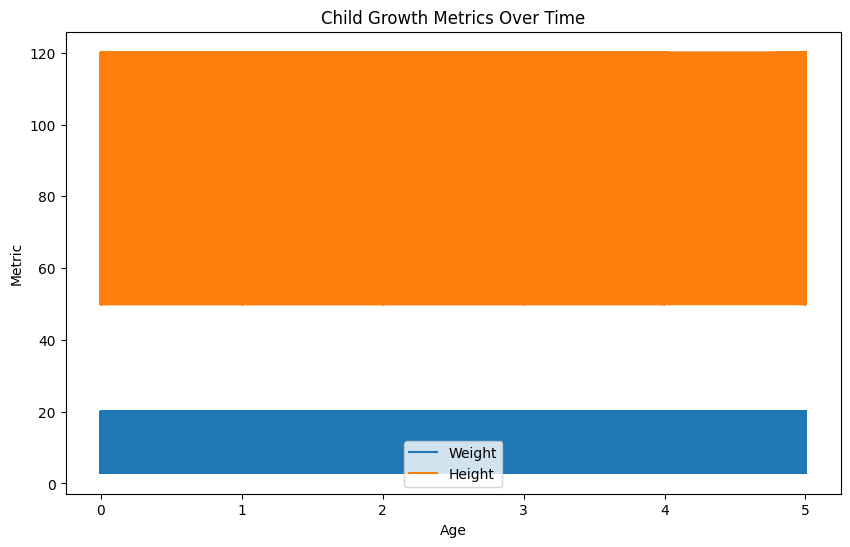

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.plot(df['age'], df['weight'], label='Weight')
plt.plot(df['age'], df['height'], label='Height')
plt.xlabel('Age')
plt.ylabel('Metric')
plt.title('Child Growth Metrics Over Time')
plt.legend()
plt.show()


### **histograms**
for weight, height, and other relevant metrics to observe their distributions. This can help identify common ranges and potential outliers.


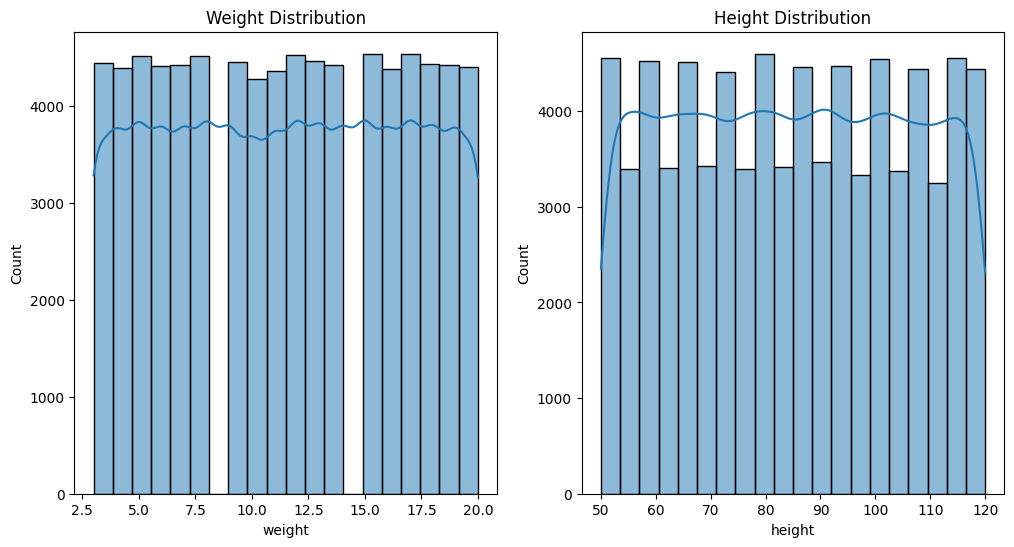

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['weight'], bins=20, kde=True)
plt.title('Weight Distribution')
plt.subplot(1, 2, 2)
sns.histplot(df['height'], bins=20, kde=True)
plt.title('Height Distribution')
plt.show()

### **Box Plots**
 for Growth Metrics by Growth Status:
This can help identify differences in growth patterns between the two groups.


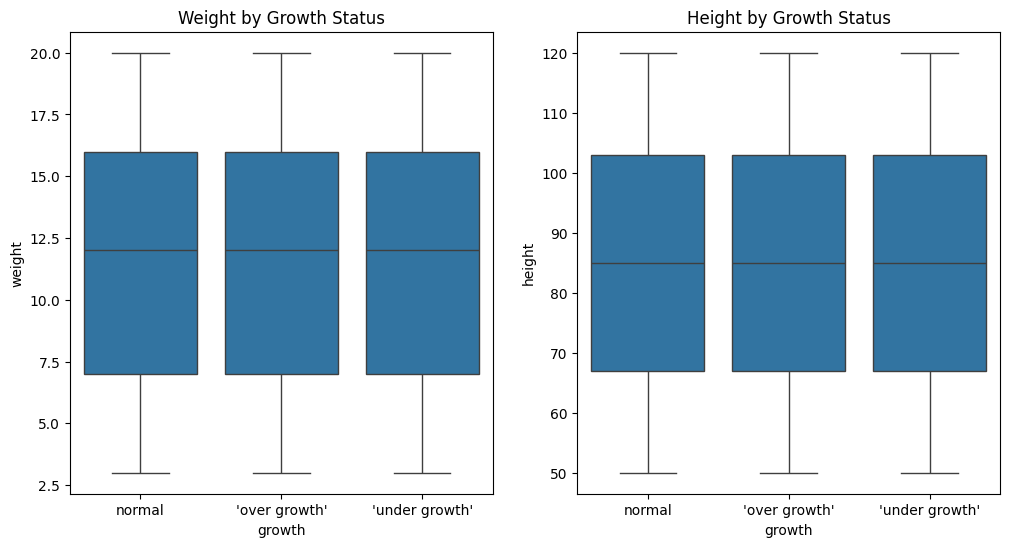

In [ ]:

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='growth', y='weight', data=df)
plt.title('Weight by Growth Status')
plt.subplot(1, 2, 2)
sns.boxplot(x='growth', y='height', data=df)
plt.title('Height by Growth Status')
plt.show()



### **Scatter Plots for Correlated Growth Metrics:**
 This can help identify patterns such as linear relationships or clusters.
Heatmap for Correlation Matrix:



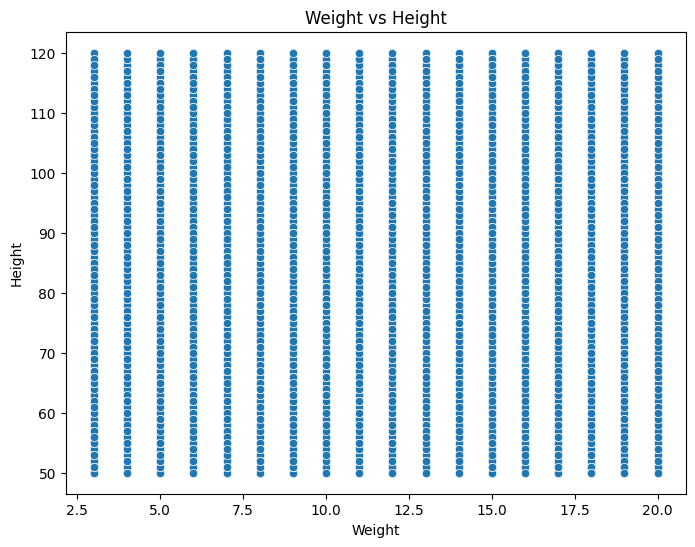

In [ ]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x='weight', y='height', data=df)
plt.title('Weight vs Height')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()


### **heatmap**
Generate a heatmap to visualize the correlation matrix between different growth metrics.


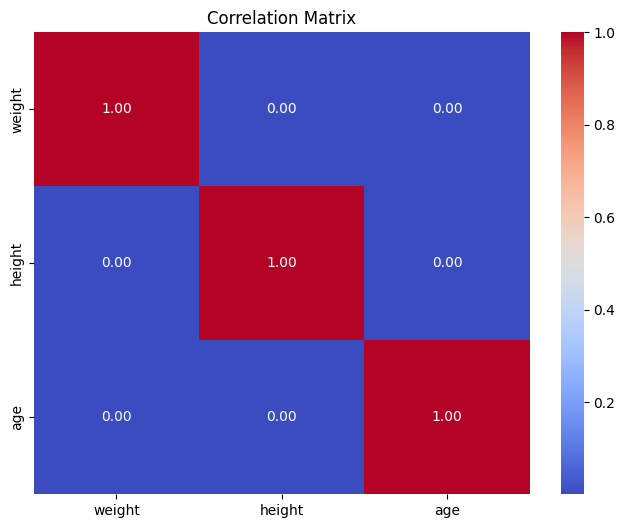

In [ ]:

correlation_matrix = df[['weight', 'height', 'age']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**These visualizations can provide insights into the trends and patterns present in your child growth dataset, allowing for a better understanding of the factors influencing growth and development. Let me know if you'd like me to create any specific visualizations or if you need further assistance!**

# **Confusion Matrix**

In [56]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

def plot_confusion_matrix(model_name, y_true, y_pred):

    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

## **Evaluate Model**

In [102]:
from sklearn.metrics import accuracy_score, precision_score

model_names = []
accuracies = []
precisions = []

def evaluate_model(model_name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    model_names.append(model_name)
    accuracies.append(accuracy)
    precisions.append(precision)
    print(f"{model_name} - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}")


# **Models**

### **Naive Bayes classifier**

In [104]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Accuracy: 0.3285528031290743

Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.33      0.33       506
           1       0.33      0.44      0.37       497
           2       0.34      0.23      0.27       531

    accuracy                           0.33      1534
   macro avg       0.33      0.33      0.32      1534
weighted avg       0.33      0.33      0.32      1534


Confusion Matrix:
[[165 217 124]
 [163 218 116]
 [178 232 121]]


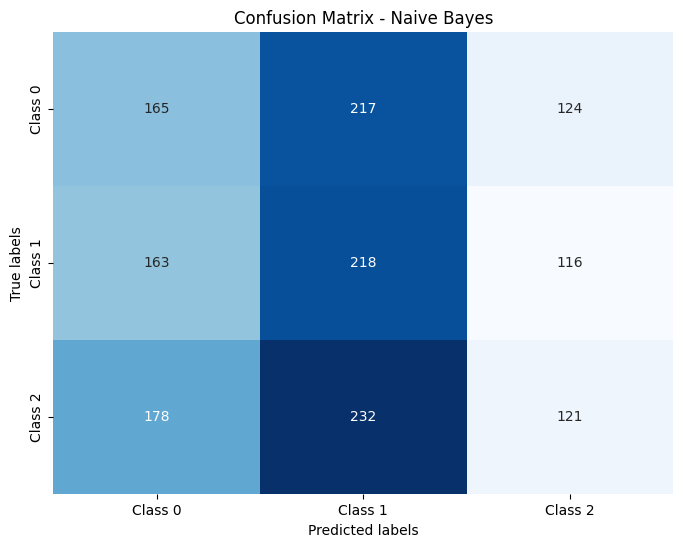

In [105]:
plot_confusion_matrix("Naive Bayes", y_test, y_pred)

In [106]:
evaluate_model("Naive Bayes", y_test, y_pred)

Naive Bayes - Accuracy: 0.33, Precision: 0.33


In [107]:
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold

#  range of values for var_smoothing
param_grid = {'var_smoothing': [1e-2, 0.003, 1e-15, 1e-6, 1e-5]}

# Initialize the Gaussian Naive Bayes classifier
model = GaussianNB()

# Initialize GridSearchCV with k-fold cross-validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=k_fold, scoring='accuracy')

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

best_var_smoothing = grid_search.best_params_['var_smoothing']

best_model = GaussianNB(var_smoothing=best_var_smoothing)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Best Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Best Accuracy: 0.3285528031290743

Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.33      0.33       506
           1       0.33      0.44      0.37       497
           2       0.34      0.23      0.27       531

    accuracy                           0.33      1534
   macro avg       0.33      0.33      0.32      1534
weighted avg       0.33      0.33      0.32      1534


Confusion Matrix:
[[165 217 124]
 [163 218 116]
 [178 232 121]]


In [108]:
evaluate_model("Naive Bayes(after hyperparameter tuning)", y_test, y_pred)

Naive Bayes(after hyperparameter tuning) - Accuracy: 0.33, Precision: 0.33


### **Gaussian Naive Bayes model**

In [109]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, cross_val_predict

# Initialize Gaussian Naive Bayes model
naive_bayes = GaussianNB()

# Perform cross-validation
y_pred_cv = cross_val_predict(naive_bayes, X_test, y_test, cv=5)

scores = cross_val_score(naive_bayes, X_train, y_train, cv=5, scoring='accuracy')
print("Gaussian Naive Bayes: Accuracy =", scores.mean(), ", STD =", scores.std())

conf_matrix = confusion_matrix(y_test, y_pred_cv)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_cv))

Gaussian Naive Bayes: Accuracy = 0.31822679222656086 , STD = 0.007394456629403277

Confusion Matrix:
[[132 143 231]
 [142 141 214]
 [176 130 225]]

Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.26      0.28       506
           1       0.34      0.28      0.31       497
           2       0.34      0.42      0.37       531

    accuracy                           0.32      1534
   macro avg       0.32      0.32      0.32      1534
weighted avg       0.32      0.32      0.32      1534



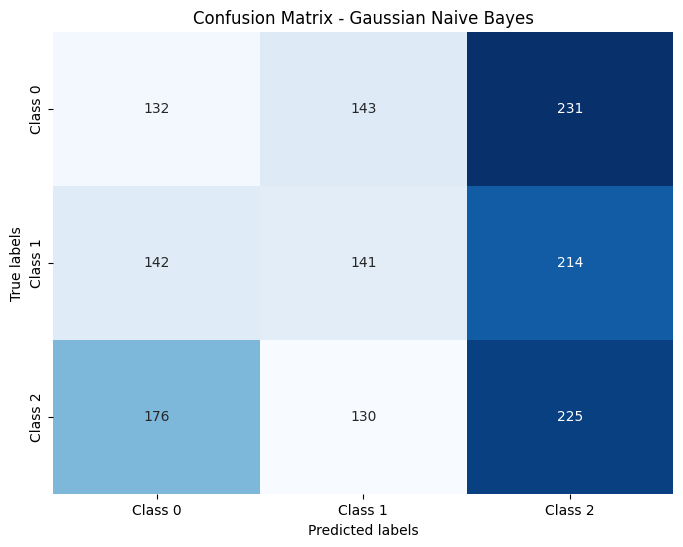

In [66]:
plot_confusion_matrix("Gaussian Naive Bayes", y_test, y_pred_cv)

In [67]:
evaluate_model("Gaussian Naive Bayes", y_test, y_pred_cv)

Gaussian Naive Bayes - Accuracy: 0.32, Precision: 0.32


### **Decision Tree**

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier()

# Training the classifier
clf.fit(X_train, y_train)

# predictions on the testing data
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Accuracy: 0.3194263363754889

Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.35      0.33       506
           1       0.29      0.29      0.29       497
           2       0.35      0.32      0.34       531

    accuracy                           0.32      1534
   macro avg       0.32      0.32      0.32      1534
weighted avg       0.32      0.32      0.32      1534


Confusion Matrix:
[[175 174 157]
 [193 143 161]
 [185 174 172]]


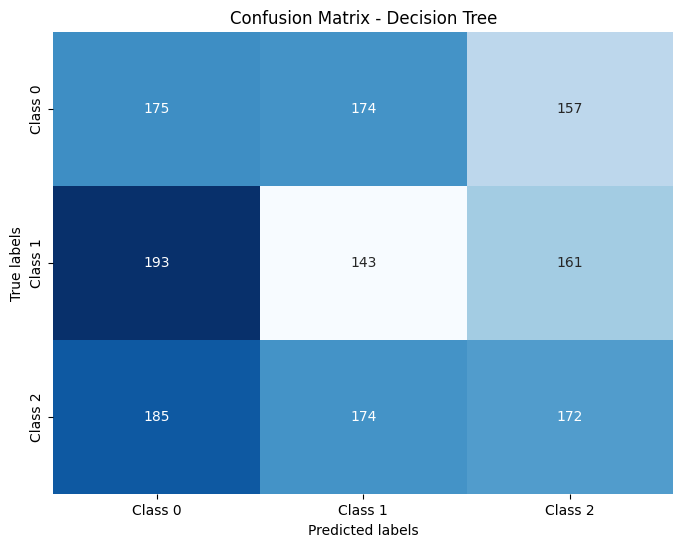

In [111]:
plot_confusion_matrix("Decision Tree", y_test, y_pred)

In [112]:
evaluate_model("Decision Tree", y_test, y_pred)

Decision Tree - Accuracy: 0.32, Precision: 0.32


In [114]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

param_dist = {
    'max_depth': [None, 10, 20, 30, 50, 100],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10]
}

optimized_decision_tree = DecisionTreeClassifier()


random_search = RandomizedSearchCV(optimized_decision_tree, param_distributions=param_dist,
                                   n_iter=100, cv=5, scoring='accuracy', n_jobs=-1)
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)

nested_score = cross_val_score(random_search, X_train, y_train, cv=outer_cv, scoring='accuracy')

print("Nested Cross-Validation Accuracy: %0.2f (+/- %0.2f)" % (nested_score.mean(), nested_score.std() * 2))

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)

y_pred = random_search.best_estimator_.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Nested Cross-Validation Accuracy: 0.34 (+/- 0.04)
Best Parameters: {'min_samples_split': 15, 'min_samples_leaf': 2, 'max_depth': 30}
Best Accuracy: 0.33827914873476206

Confusion Matrix:
[[188 184 134]
 [203 156 138]
 [211 183 137]]

Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.37      0.34       506
           1       0.30      0.31      0.31       497
           2       0.33      0.26      0.29       531

    accuracy                           0.31      1534
   macro avg       0.32      0.31      0.31      1534
weighted avg       0.32      0.31      0.31      1534



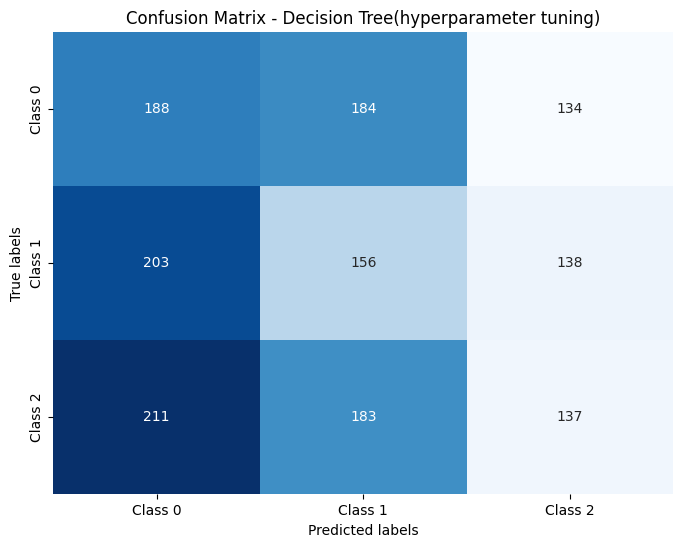

In [115]:
plot_confusion_matrix("Decision Tree(hyperparameter tuning)", y_test, y_pred)

In [116]:
evaluate_model("Decision Tree(hyperparameter tuning)", y_test, y_pred)

Decision Tree(hyperparameter tuning) - Accuracy: 0.31, Precision: 0.32


### **Gradient Boosting Classifier**

In [117]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, classification_report

gbm = GradientBoostingClassifier()

param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.001, 0.005, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.6, 0.8, 1.0],
    'max_features': ['sqrt', 'log2', None]
}

random_search = RandomizedSearchCV(gbm, param_distributions=param_dist,
                                   n_iter=100, cv=5, scoring='accuracy', n_jobs=-1)

random_search.fit(X_train, y_train)


print("Best Parameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)

test_accuracy = random_search.best_estimator_.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

y_pred = random_search.best_estimator_.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Best Parameters: {'subsample': 0.8, 'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 5, 'learning_rate': 0.001}
Best Accuracy: 0.34203025722228647
Test Accuracy: 0.32529335071707954

Confusion Matrix:
[[ 37 469   0]
 [ 34 462   1]
 [ 31 500   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.07      0.12       506
           1       0.32      0.93      0.48       497
           2       0.00      0.00      0.00       531

    accuracy                           0.33      1534
   macro avg       0.23      0.33      0.20      1534
weighted avg       0.22      0.33      0.20      1534



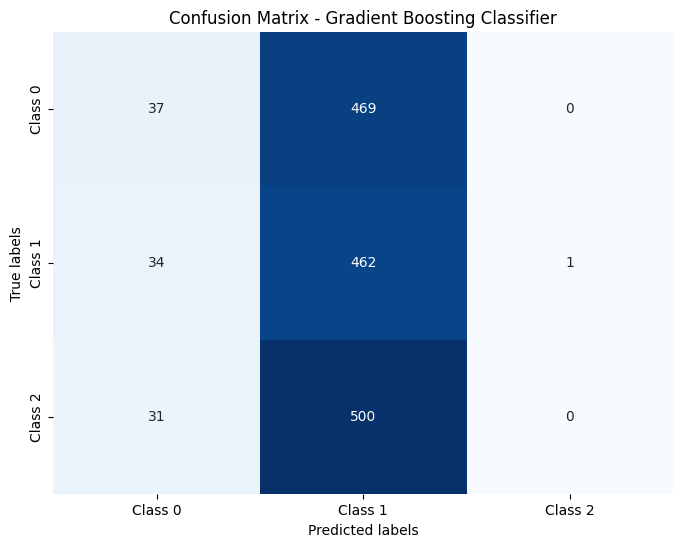

In [118]:
plot_confusion_matrix("Gradient Boosting Classifier", y_test, y_pred)

In [119]:
evaluate_model("Gradient Bosting Classifier", y_test, y_pred)

Gradient Bosting Classifier - Accuracy: 0.33, Precision: 0.22


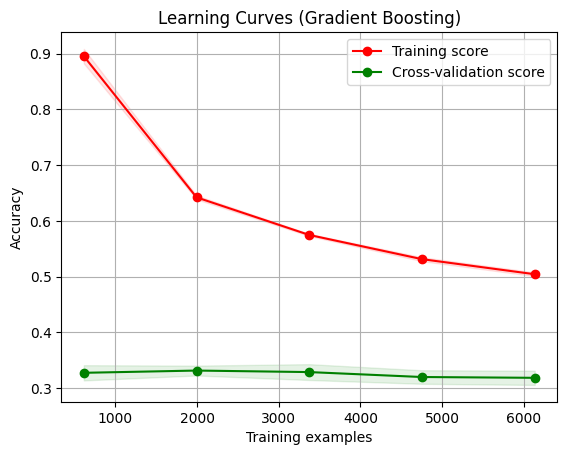

In [120]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier()

# function to plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curve
title = "Learning Curves (Gradient Boosting)"
plot_learning_curve(gbm, title, X, y, cv=5, n_jobs=-1)

plt.show()


# **XGBoost classifier**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier

# Assuming X and y are your features and target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)

# Train the classifier
xgb_classifier.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = xgb_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.3194263363754889

Confusion Matrix:
[[178 172 156]
 [191 141 165]
 [177 183 171]]

Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.35      0.34       506
           1       0.28      0.28      0.28       497
           2       0.35      0.32      0.33       531

    accuracy                           0.32      1534
   macro avg       0.32      0.32      0.32      1534
weighted avg       0.32      0.32      0.32      1534



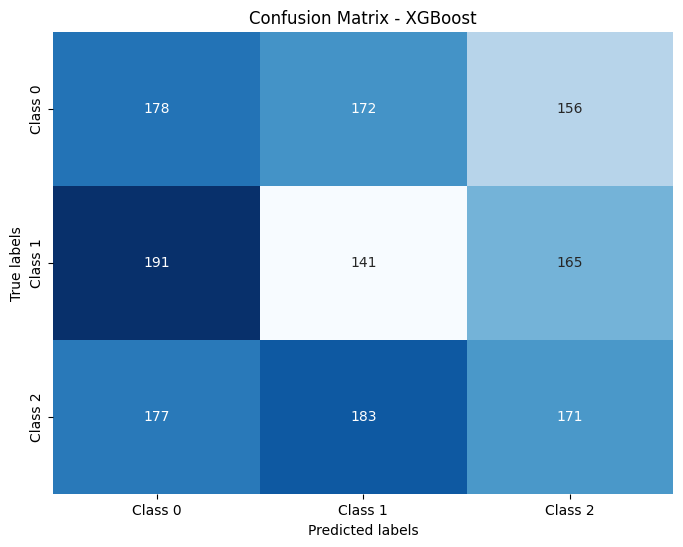

In [ ]:
plot_confusion_matrix("XGBoost", y_test, y_pred)

In [ ]:
evaluate_model("XGBoost", y_test, y_pred)

XGBoost - Accuracy: 0.32, Precision: 0.32


### **Random Forest Classifier**

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict

random_forest = RandomForestClassifier()

y_pred_cv = cross_val_predict(random_forest, X_test, y_test, cv=5)
scores = cross_val_score(random_forest, X_train, y_train, cv=5, scoring='accuracy')
print("Random Forest: Accuracy =", scores.mean(), ", STD =", scores.std())

conf_matrix = confusion_matrix(y_test, y_pred_cv)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_cv))

Random Forest: Accuracy = 0.32328069762587563 , STD = 0.007852466819262091

Confusion Matrix:
[[156 154 196]
 [160 148 189]
 [183 166 182]]

Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.31      0.31       506
           1       0.32      0.30      0.31       497
           2       0.32      0.34      0.33       531

    accuracy                           0.32      1534
   macro avg       0.32      0.32      0.32      1534
weighted avg       0.32      0.32      0.32      1534



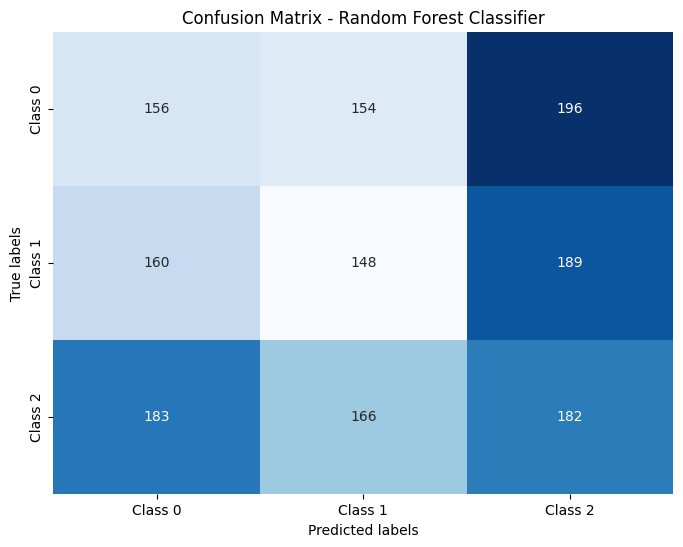

In [72]:
plot_confusion_matrix("Random Forest Classifier", y_test, y_pred_cv)

In [73]:
evaluate_model("Random Forest Classifier", y_test, y_pred_cv)

Random Forest Classifier - Accuracy: 0.32, Precision: 0.32


In [ ]:
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

model_rf = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(estimator=model_rf, param_grid=param_grid_rf, cv=5, scoring='accuracy')

grid_search_rf.fit(X_train, y_train)

best_params_rf = grid_search_rf.best_params_

best_model_rf = RandomForestClassifier(**best_params_rf, random_state=42)
best_model_rf.fit(X_train, y_train)

y_pred_rf = best_model_rf.predict(X_test)


accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Best Random Forest Accuracy:", accuracy_rf)

print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix (Random Forest):")
print(conf_matrix_rf)


Best Random Forest Accuracy: 0.31747066492829207

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.31      0.34      0.33       506
           1       0.30      0.34      0.32       497
           2       0.35      0.28      0.31       531

    accuracy                           0.32      1534
   macro avg       0.32      0.32      0.32      1534
weighted avg       0.32      0.32      0.32      1534


Confusion Matrix (Random Forest):
[[171 200 135]
 [183 167 147]
 [189 193 149]]


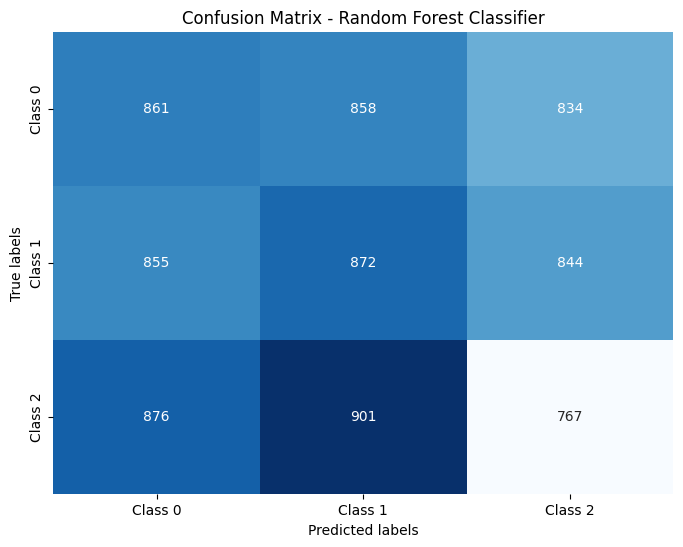

In [ ]:
plot_confusion_matrix("Random Forest Classifier", y, y_pred_cv)

In [ ]:
evaluate_model("Random Forest Classifier(hyperparameter tuning)", y, y_pred_cv)

Random Forest Classifier(hyperparameter tuning) - Accuracy: 0.33, Precision: 0.33


### **K-Nearest Neighbors (KNN)**

In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict

# Initialize KNN model
knn = KNeighborsClassifier()

y_pred_cv = cross_val_predict(knn, X_test, y_test, cv=5)

scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
print("K-Nearest Neighbors (KNN): Accuracy =", scores.mean(), ", STD =", scores.std())

conf_matrix = confusion_matrix(y_test, y_pred_cv)
print("\nConfusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_cv))

K-Nearest Neighbors (KNN): Accuracy = 0.32751814462787393 , STD = 0.0020545412044044335

Confusion Matrix:
[[214 195  97]
 [227 161 109]
 [227 175 129]]

Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.42      0.36       506
           1       0.30      0.32      0.31       497
           2       0.39      0.24      0.30       531

    accuracy                           0.33      1534
   macro avg       0.34      0.33      0.33      1534
weighted avg       0.34      0.33      0.32      1534



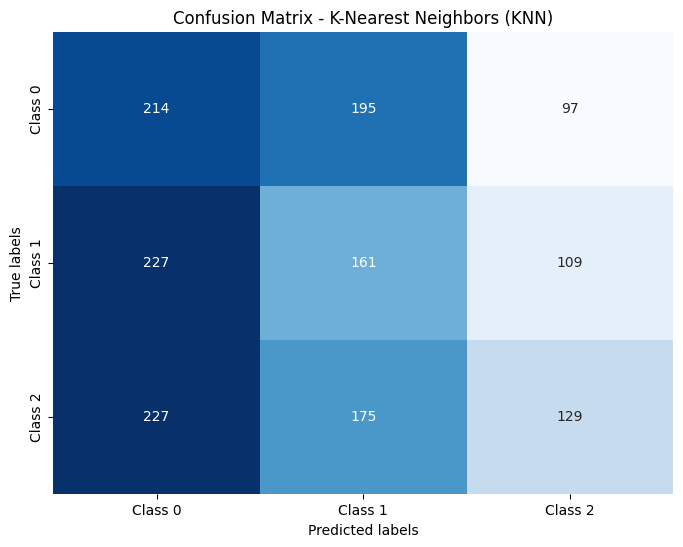

In [75]:
plot_confusion_matrix("K-Nearest Neighbors (KNN)", y_test, y_pred_cv)

In [76]:
evaluate_model("K-Nearest Neighbors (KNN)", y_test, y_pred_cv)

K-Nearest Neighbors (KNN) - Accuracy: 0.33, Precision: 0.34


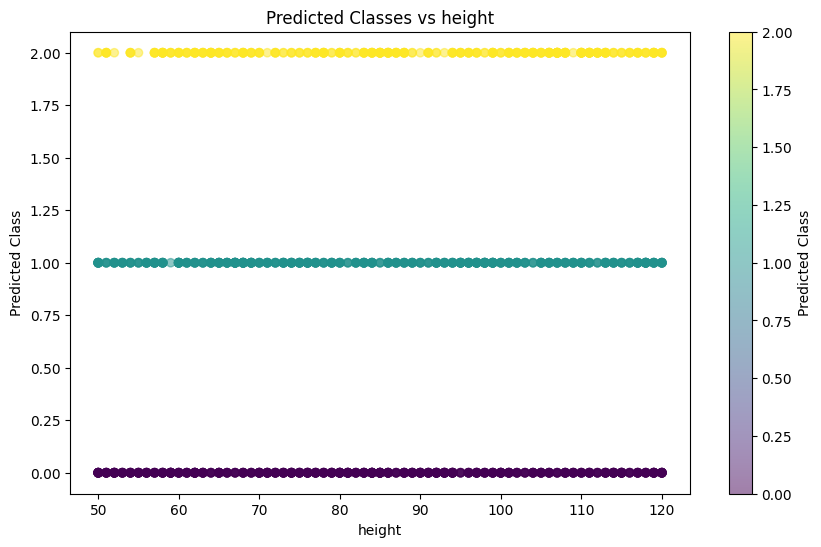

In [78]:
# Choose a feature for visualization
feature_index = 1  # Change this index to choose a different feature
feature_name = df.columns[feature_index]

plt.figure(figsize=(10, 6))
plt.scatter(X_test.iloc[:, feature_index], y_pred_cv, c=y_pred_cv, cmap='viridis', marker='o', alpha=0.5)
plt.xlabel(feature_name)
plt.ylabel('Predicted Class')
plt.title('Predicted Classes vs ' + feature_name)
plt.colorbar(label='Predicted Class')
plt.show()


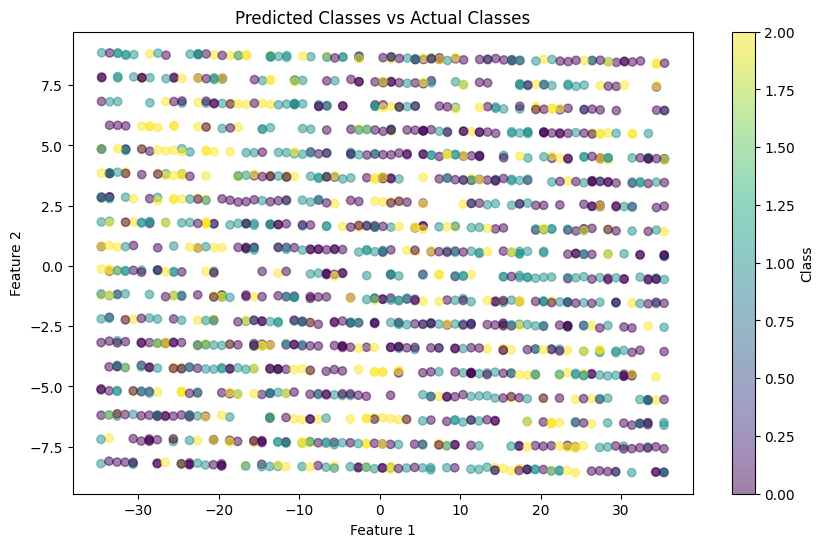

In [79]:
from sklearn.decomposition import PCA
# Dimensionality reduction for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_test)

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred_cv, cmap='viridis', marker='o', alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Predicted Classes vs Actual Classes')
plt.colorbar(label='Class')
plt.show()

### **Multi-Layer Perceptron (MLP)**

In [81]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)

y_pred_cv = cross_val_predict(mlp, X_test, y_test, cv=5)

scores = cross_val_score(mlp, X_train, y_train, cv=5, scoring='accuracy')
print("MLP Classifier: Accuracy =", scores.mean(), ", STD =", scores.std())

conf_matrix = confusion_matrix(y_test, y_pred_cv)
print("\nConfusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_cv))


MLP Classifier: Accuracy = 0.3286616650114139 , STD = 0.006596721887079925

Confusion Matrix:
[[161 170 175]
 [164 163 170]
 [200 176 155]]

Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.32      0.31       506
           1       0.32      0.33      0.32       497
           2       0.31      0.29      0.30       531

    accuracy                           0.31      1534
   macro avg       0.31      0.31      0.31      1534
weighted avg       0.31      0.31      0.31      1534



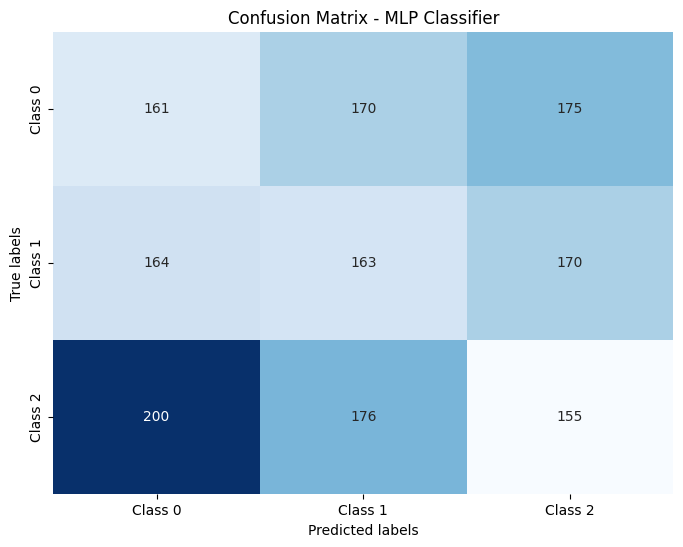

In [82]:
plot_confusion_matrix("MLP Classifier", y_test, y_pred_cv)

In [83]:
evaluate_model("MLP Classifier", y_test, y_pred_cv)

MLP Classifier - Accuracy: 0.31, Precision: 0.31


In [84]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist_nn = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [200, 300, 400]
}

# Initialize MLPClassifier
model_nn = MLPClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search_nn = RandomizedSearchCV(estimator=model_nn, param_distributions=param_dist_nn, n_iter=50, cv=5, scoring='accuracy', random_state=42)

random_search_nn.fit(X_train, y_train)

# Get the best parameters
best_params_nn = random_search_nn.best_params_

best_model_nn = MLPClassifier(**best_params_nn, random_state=42)
best_model_nn.fit(X_train, y_train)

y_pred_nn = best_model_nn.predict(X_test)

accuracy_nn = accuracy_score(y_test, y_pred_nn)
print("Best Neural Network Accuracy:", accuracy_nn)

print("\nClassification Report (Neural Network):")
print(classification_report(y_test, y_pred_nn))

conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
print("\nConfusion Matrix (Neural Network):")
print(conf_matrix_nn)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Best Neural Network Accuracy: 0.3239895697522816

Classification Report (Neural Network):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       506
           1       0.32      1.00      0.49       497
           2       0.00      0.00      0.00       531

    accuracy                           0.32      1534
   macro avg       0.11      0.33      0.16      1534
weighted avg       0.10      0.32      0.16      1534


Confusion Matrix (Neural Network):
[[  0 506   0]
 [  0 497   0]
 [  0 531   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


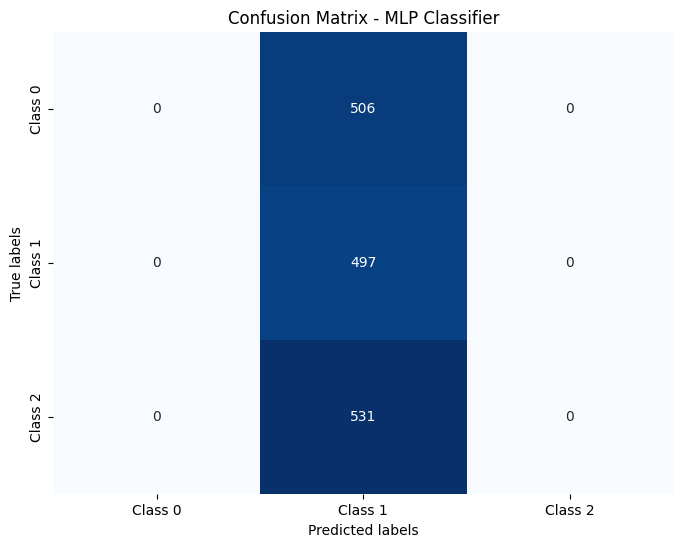

In [85]:
plot_confusion_matrix("MLP Classifier", y_test, y_pred_nn)

In [86]:
evaluate_model("MLP Classifier", y_test, y_pred_nn)

MLP Classifier - Accuracy: 0.32, Precision: 0.10


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **SVM**

In [99]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

svm_model = SVC()

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.32529335071707954

Confusion Matrix:
[[  4 502   0]
 [  2 495   0]
 [  3 528   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.01      0.02       506
           1       0.32      1.00      0.49       497
           2       0.00      0.00      0.00       531

    accuracy                           0.33      1534
   macro avg       0.26      0.33      0.17      1534
weighted avg       0.25      0.33      0.16      1534



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


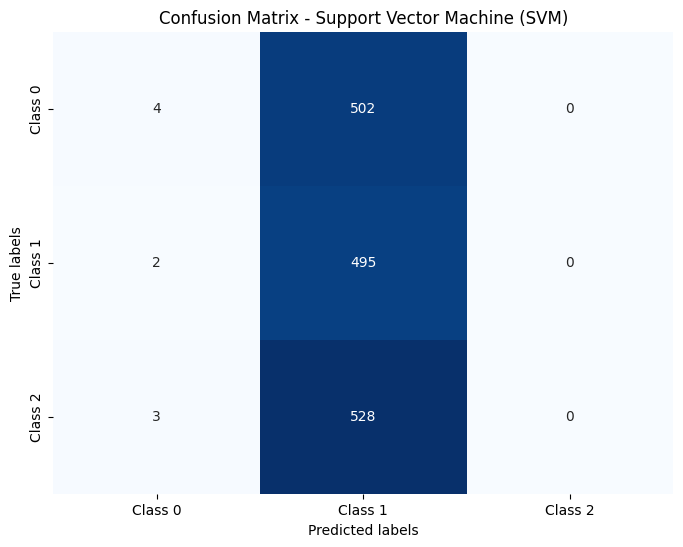

In [101]:
plot_confusion_matrix("Support Vector Machine (SVM)", y_test, y_pred)

In [103]:
evaluate_model("Support Vector Machine (SVM)", y_test, y_pred)

Support Vector Machine (SVM) - Accuracy: 0.33, Precision: 0.25


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **Logistic Regression**

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

logistic_regression = LogisticRegression(max_iter=1000)

param_dist = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
}


random_search_logistic = RandomizedSearchCV(logistic_regression, param_distributions=param_dist,
                                            n_iter=100, cv=5, scoring='accuracy', n_jobs=-1)

nested_score_logistic = cross_val_score(random_search_logistic, X, y, cv=outer_cv, scoring='accuracy')

print("Nested Cross-Validation Accuracy for Logistic Regression: %0.2f (+/- %0.2f)" % (nested_score_logistic.mean(), nested_score_logistic.std() * 2))

random_search_logistic.fit(X_train, y_train)

print("Best Parameters for Logistic Regression:", random_search_logistic.best_params_)
print("Best Accuracy for Logistic Regression:", random_search_logistic.best_score_)

y_pred = random_search_logistic.best_estimator_.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 12 is smaller than n_iter=100. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.

Nested Cross-Validation Accuracy for Logistic Regression: 0.32 (+/- 0.01)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 12 is smaller than n_iter=100. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.

Best Parameters for Logistic Regression: {'penalty': 'l2', 'C': 0.01}
Best Accuracy for Logistic Regression: 0.32507435342105506

Confusion Matrix:
[[159 230 117]
 [165 220 112]
 [186 242 103]]

Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.31      0.31       506
           1       0.32      0.44      0.37       497
           2       0.31      0.19      0.24       531

    accuracy                           0.31      1534
   macro avg       0.31      0.32      0.31      1534
weighted avg       0.31      0.31      0.31      1534



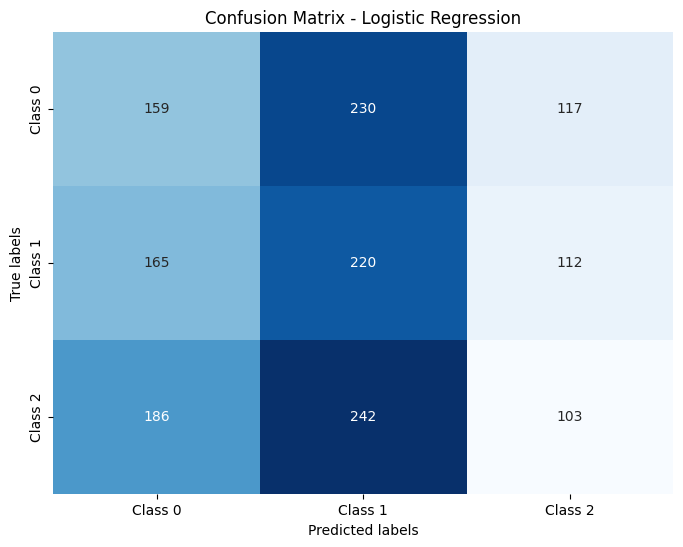

In [88]:
plot_confusion_matrix("Logistic Regression", y_test, y_pred)

In [89]:
evaluate_model("Logistic Regression", y_test, y_pred)

Logistic Regression - Accuracy: 0.31, Precision: 0.31


### **Isolation Forest**

In [90]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(contamination=0.1)
isolation_forest.fit(X_train)
predictions = isolation_forest.predict(X_test)

accuracy = (predictions == 1).sum() / len(predictions)

print("Accuracy:", accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Accuracy: 0.8989569752281616


In [91]:
predictions = isolation_forest.predict(X_test)
# Manually label some data points as outliers
true_labels = [-1 if i < len(X_test) * 0.1 else 1 for i in range(len(X_test))]

precision = precision_score(true_labels, predictions)

print("Precision:", precision)

Precision: 0.8955765047135605


In [92]:
from sklearn.metrics import confusion_matrix

# Assuming X is your dataset and true_labels is a list of true labels
true_labels = [-1 if i < len(X_test) * 0.1 else 1 for i in range(len(X_test))]

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predictions)

print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[  10  144]
 [ 145 1235]]


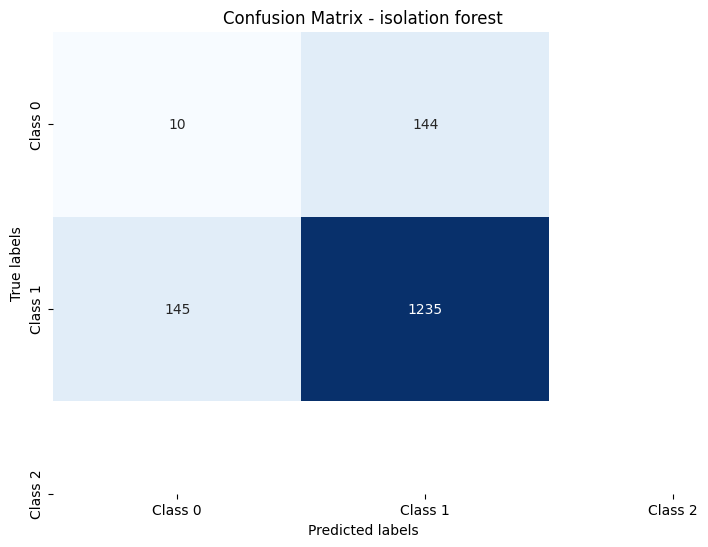

In [93]:
plot_confusion_matrix("isolation forest", true_labels, predictions)

### **SHOWING ACCURACY AND PRECISION OF DIFFERENT MODELS**

In [121]:
import pandas as pd

results_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'Precision': precisions
})

print("\nResults:")
print(results_df)


Results:
                                      Model  Accuracy  Precision
0              Support Vector Machine (SVM)  0.325293   0.251767
1                               Naive Bayes  0.328553   0.329477
2  Naive Bayes(after hyperparameter tuning)  0.328553   0.329477
3                             Decision Tree  0.319426   0.320252
4      Decision Tree(hyperparameter tuning)  0.313559   0.315600
5               Gradient Bosting Classifier  0.325293   0.224254


# **Before hyper parameter tuning**

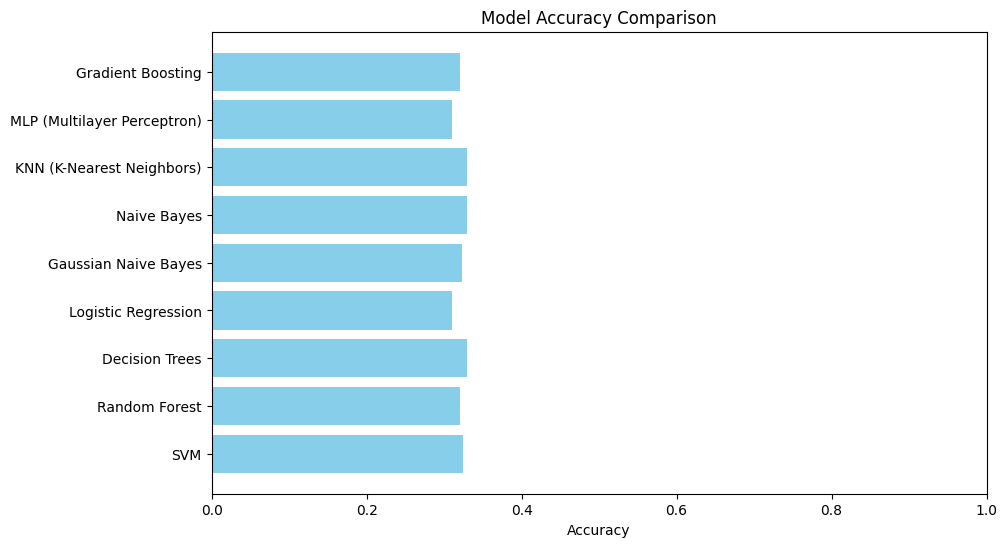

In [94]:
import numpy as np

# Model names
model_names = ["Gradient Boosting", "MLP (Multilayer Perceptron)", "KNN (K-Nearest Neighbors)",
          "Naive Bayes", "Gaussian Naive Bayes", "Logistic Regression",
          "Decision Trees", "Random Forest", "SVM"]

# Accuracy values
accuracies = np.array([0.32, 0.31, 0.33, 0.33, 0.323, 0.31, 0.33, 0.32, 0.325])

# # Print the arrays
# print("Model Names:", models)
# print("Accuracies:", accuracies)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlim(0, 1)
plt.gca().invert_yaxis()
plt.show()



# **After hyper parameter tuning**

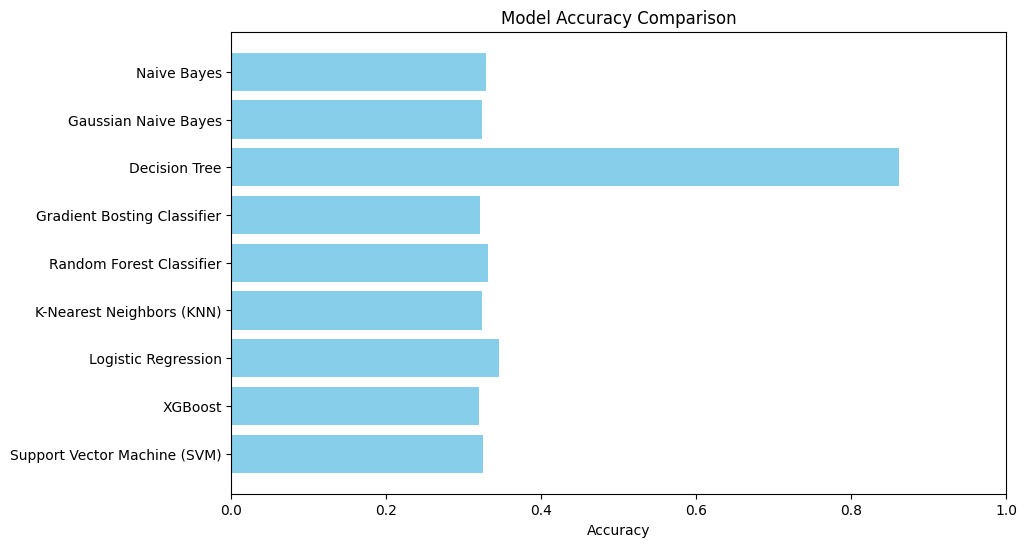

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlim(0, 1)
plt.gca().invert_yaxis()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlim(0, 1)
plt.gca().invert_yaxis()
plt.show()
